In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("C:/Users/Thavanesh/Downloads/perrin-freres-monthly-champagne-.csv")

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.drop(106,axis=0,inplace=True)

In [8]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [9]:
df.drop(105,axis=0,inplace=True)

In [10]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
df['Month']=pd.to_datetime(df['Month'])

In [12]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [13]:
df.set_index('Month',inplace=True)

In [14]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [15]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Step 2: Visualize the Data

<Axes: xlabel='Month'>

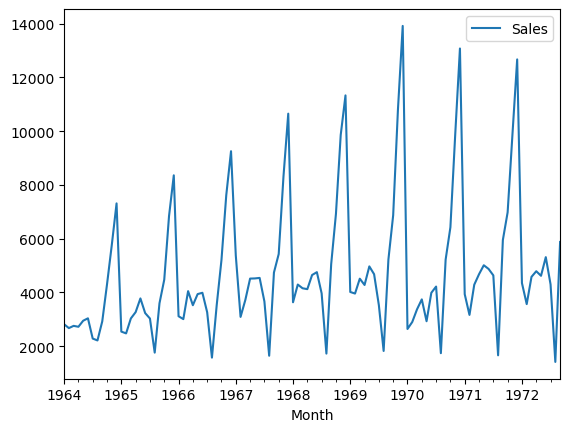

In [16]:
df.plot()

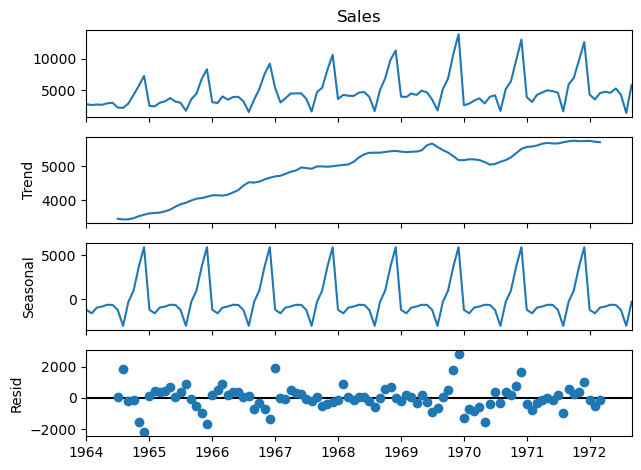

In [17]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(df['Sales'],model='addictive')
fig=decomposition.plot()
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
test_result=adfuller(df['Sales'])

In [20]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [21]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.833593056327635
p-value : 0.36391577166023914
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Diffrencing

In [22]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [23]:
# Set the display options to show all rows and columns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

<Axes: xlabel='Month'>

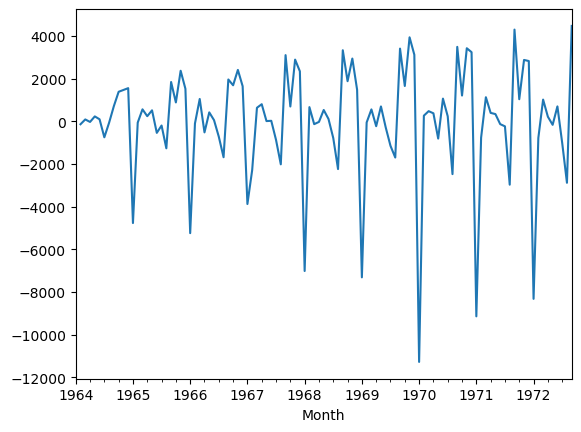

In [24]:
df['Sales First Difference'].plot()


In [25]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.189896448051003
p-value : 2.5196204473870433e-10
#Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [26]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [27]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [28]:
## Again test dickey fuller test

adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

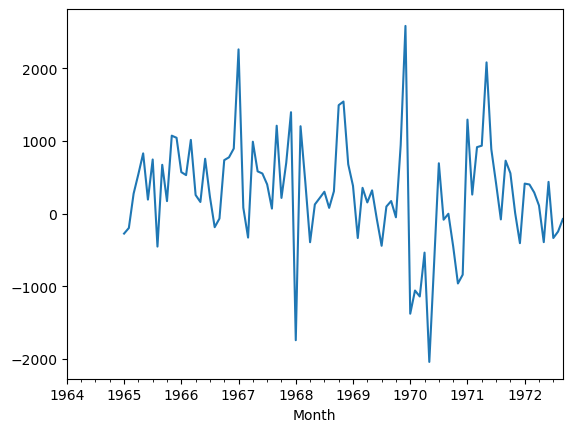

In [29]:
df['Seasonal First Difference'].plot()

# Auto Regressive Model


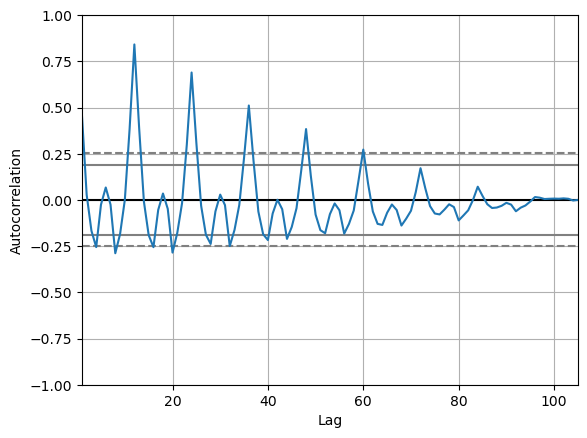

In [30]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

## Final Thoughts on Autocorrelation and Partial Autocorrelation
* Identification of an AR model is often best done with the PACF.

   * For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

* Identification of an MA model is often best done with the ACF rather than the PACF.
  
  
  
  * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

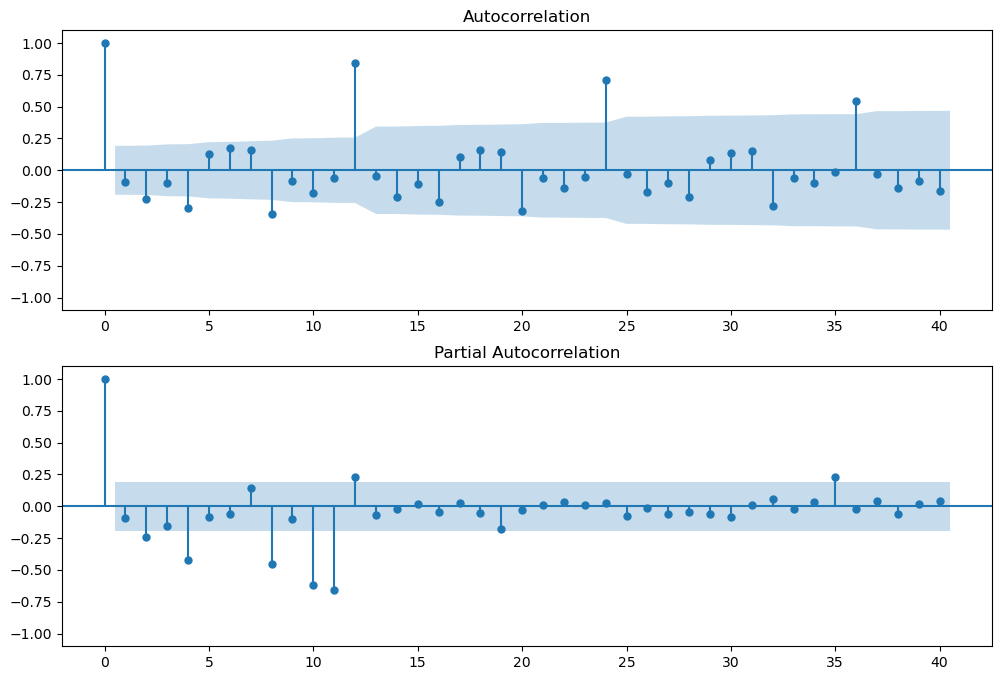

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Sales First Difference'].dropna(),lags=40,ax=ax1)
ax1.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales First Difference'].dropna(),lags=40,ax=ax2)
ax2.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits
print()

In [33]:
# For non-seasonal data
#p=2, d=1, q=2
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [113]:
s=round(len(df)*90/100)
train=df[:s]
test=df[s:]

In [114]:
model=ARIMA(train['Sales'],order=(2,1,2))
model_fit=model.fit()

C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [115]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   94
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -845.080
Date:                Fri, 01 Mar 2024   AIC                           1700.160
Time:                        15:52:36   BIC                           1712.823
Sample:                    01-01-1964   HQIC                          1705.273
                         - 10-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2313      0.165     -1.400      0.161      -0.555       0.093
ar.L2          0.1660      0.136      1.218      0.223      -0.101       0.433
ma.L1         -0.1158      0.117     -0.986      0.324      -0.346       0.114
ma.L2         -0.8072      0.128     -6.294      0.000      -1.059      -0.556
sigma2       4.48e+06   5.97e+05      7.504      0.000    3.31e+06    5.65e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.75
Prob(Q):                              0.95   Prob(JB):                         0.25
Heteroskedasticity (H):               3.89   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,Sales,Sales First Difference,Seasonal First Difference,forecast
Month,,,,
1972-05-01,4618.0,-170.0,-392.0,5131.600994
1972-06-01,5312.0,694.0,438.0,5140.882734
1972-07-01,4298.0,-1014.0,-335.0,5135.666048
1972-08-01,1413.0,-2885.0,-246.0,5138.413798
1972-09-01,5877.0,4464.0,-74.0,5136.912072


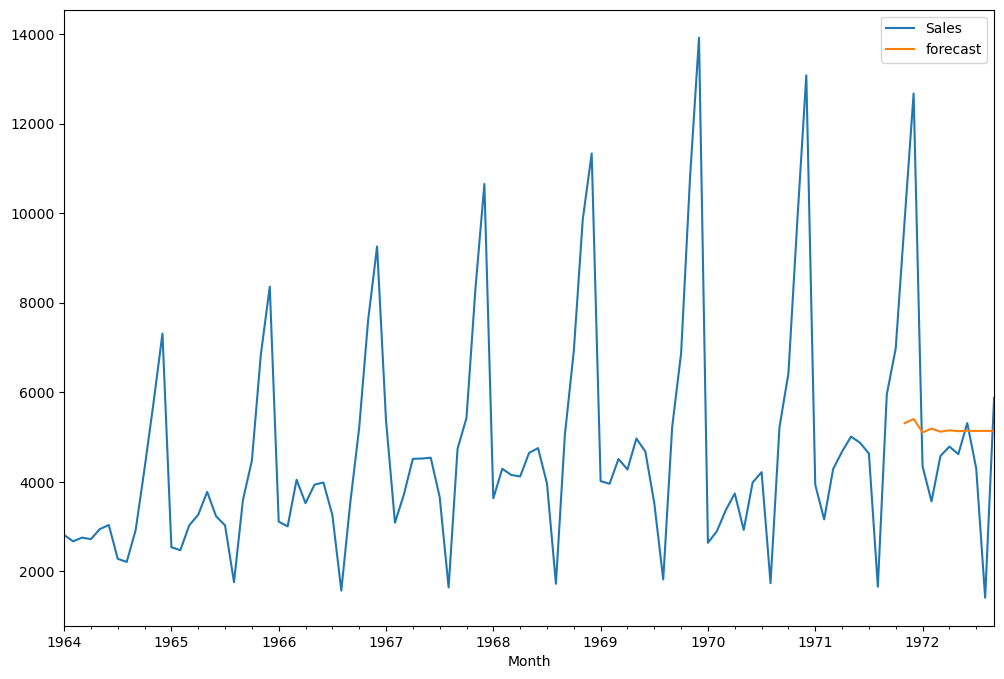

In [119]:
df['forecast']=model_fit.predict(start=test.index[0],end=test.index[-1],dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))
df.tail()


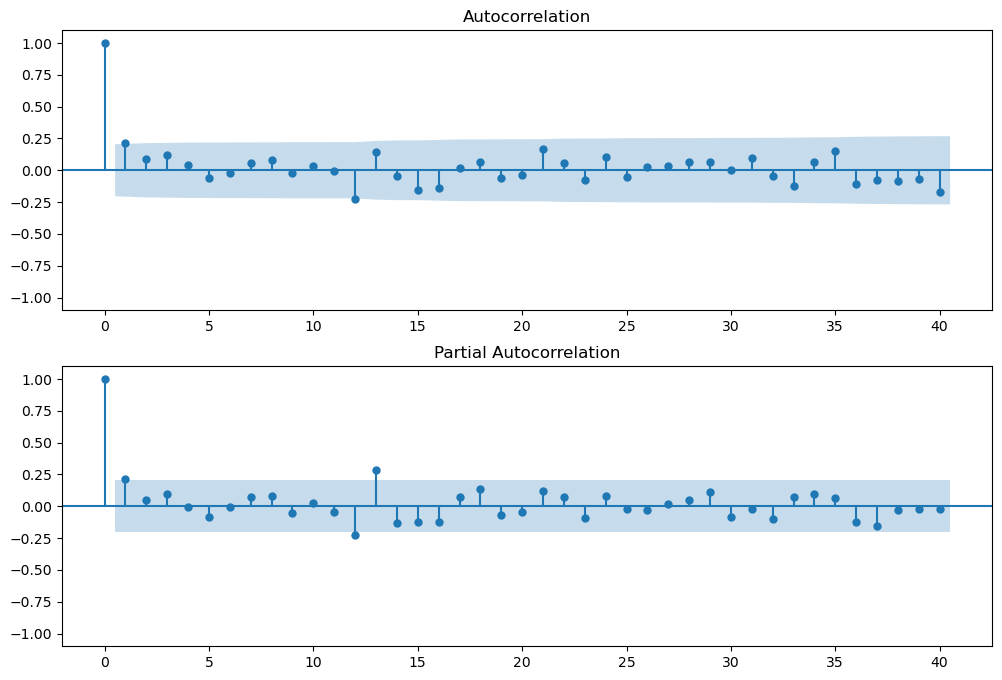

In [120]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax1.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)
ax2.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits
print()

In [121]:
model=SARIMAX(train['Sales'],order=(2, 1, 2),seasonal_order=(1,0,1,12))
results=model.fit()

C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

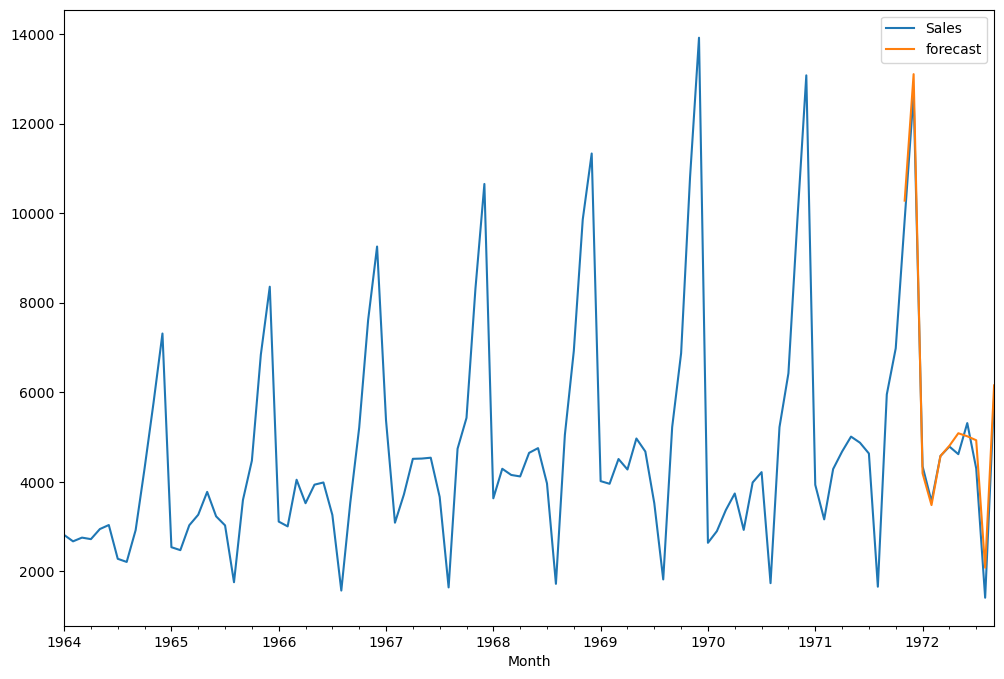

In [122]:
df['forecast']=results.predict(start=test.index[0],end=test.index[-1],dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [123]:
test[['Sales','forecast']]

,Sales,forecast
Month,,
1971-11-01,9851.0,10278.542582
1971-12-01,12670.0,13102.794346
1972-01-01,4348.0,4191.928419
1972-02-01,3564.0,3481.292983
1972-03-01,4577.0,4576.361238
1972-04-01,4788.0,4805.045079
1972-05-01,4618.0,5085.312687
1972-06-01,5312.0,5017.602573
1972-07-01,4298.0,4928.909774


In [124]:
from sklearn.metrics import mean_squared_error
print(df['Sales'].mean())
np.sqrt(mean_squared_error(test['Sales'].dropna(),df['forecast'].dropna()))

4761.152380952381


384.8960429208175

In [140]:
from pandas.tseries.offsets import DateOffset
m=5
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,m)]

In [141]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [142]:
future_datest_df.tail(16)

,Sales,Sales First Difference,Seasonal First Difference,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN


In [143]:
future_df=pd.concat([df,future_datest_df])

In [144]:
model=SARIMAX(df['Sales'],order=(2, 1, 2),seasonal_order=(1,0,1,12))
results1=model.fit()

C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

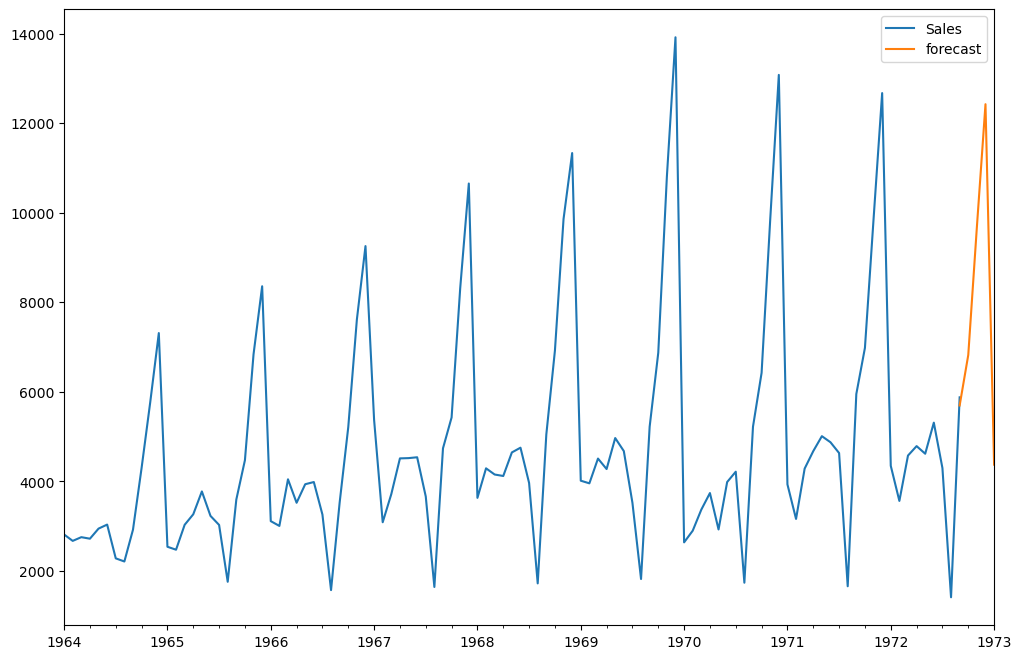

In [145]:
future_df['forecast'] = results1.predict(start =len(df)-1, end = len(df)+m, dynamic= True)  

future_df[['Sales', 'forecast']].plot(figsize=(12, 8))


In [151]:
forecast_1972 = future_df['forecast']['1972-09-01']

# Display the forecasted values for the year 1975
print(forecast_1972)


5695.835430546873


In [149]:
future_df.loc['1972-05-01',['Sales','forecast']]


Sales       4618.0
forecast       NaN
Name: 1972-05-01 00:00:00, dtype: float64

In [150]:
future_df[['Sales','forecast']]

,Sales,forecast
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-09-01,5877.0,5695.835431
1972-10-01,NaN,6822.155528
1972-11-01,NaN,9677.793171
1972-12-01,NaN,12422.018784
